In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

C:\Users\Windows-10\Anaconda2\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


### Import dataset

In [3]:
dataset = pd.read_csv("data/news_geo_data.csv")

In [4]:
dataset[:10]

,headline,cities,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
5,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
7,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
8,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR


In [5]:
coordinates = dataset[["latitude", "longitude"]]

## K-means

### Elbow method to determine K

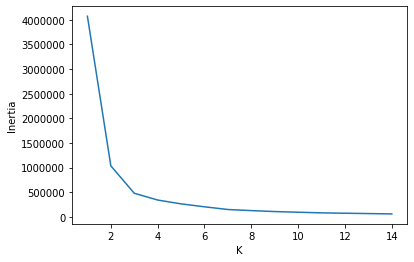

In [6]:
k_values = range(1, 15)
inertia_values = [KMeans(k).fit(coordinates).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [7]:
km_model = KMeans(n_clusters=6, random_state=0).fit(coordinates)
labels = km_model.labels_

In [8]:
labels[:10]

array([0, 0, 0, 5, 0, 5, 0, 2, 0, 5])

### Visualizing clusters using k-means on map

In [10]:
latitudes, longitudes = np.array(coordinates).T
df = pd.DataFrame({'lat': latitudes, 'lng': longitudes,
                   'Cluster': labels})

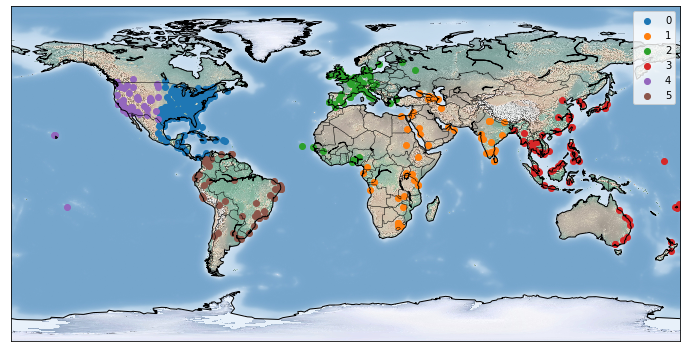

In [19]:
fig = plt.figure(figsize=(12, 8))

for cluster_id, df_cluster in df.groupby('Cluster'):
    map_plotter.scatter(df_cluster.lng, df_cluster.lat, latlon=True, label=cluster_id)

map_plotter.shadedrelief()
map_plotter.drawcoastlines()
map_plotter.drawcountries()

plt.legend()
plt.show()

## DBSCAN